In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import gridspec
from scipy import stats
from sklearn import preprocessing


In [3]:
datafile="GD1-circle-140-30-15.pkl"
gaiadata=np.load(datafile,allow_pickle=True)
gaiadata2=np.array(gaiadata[['pmdec','pmra','dec','ra','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag']].astype('float32'))
gaiadata2 = np.vstack([gaiadata2[:,0].T,
           gaiadata2[:,1].T,
           gaiadata2[:,2].T,
           gaiadata2[:,3].T,
           (gaiadata2[:,5]-gaiadata2[:,6]).T,
           gaiadata2[:,4].T]).T
gaiadata2 = gaiadata2[np.sum(np.isnan(gaiadata2),axis=1)==0]
#if(dataset=='jhelum' or dataset=='weird'):
#    gaiadata2[:,3]=gaiadata2[:,3]-360*(gaiadata2[:,3]//180)
# Just use radius 15 circle
center_dec=0.5*(np.max(gaiadata2[:,2])+np.min(gaiadata2[:,2]))
center_ra=0.5*(np.max(gaiadata2[:,3])+np.min(gaiadata2[:,3]))
radius=np.sqrt((gaiadata2[:,2]-center_dec)**2+(gaiadata2[:,3]-center_ra)**2)
# gaiadata2=gaiadata2[radius<15]
np.random.shuffle(gaiadata2)

In [4]:
len(gaiadata2)

1231679

In [5]:
len(gaiadata2[radius<15])

1032672

In [6]:
gaiadata3=np.array(gaiadata[gaiadata['streammask']==1][['pmdec','pmra','dec','ra','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag']].astype('float32'))
gaiadata3 = np.vstack([gaiadata3[:,0].T,
           gaiadata3[:,1].T,
           gaiadata3[:,2].T,
           gaiadata3[:,3].T,
           (gaiadata3[:,5]-gaiadata3[:,6]).T,
           gaiadata3[:,4].T]).T
gaiadata3 = gaiadata3[np.sum(np.isnan(gaiadata3),axis=1)==0]
#if(dataset=='jhelum' or dataset=='weird'):
#    gaiadata2[:,3]=gaiadata2[:,3]-360*(gaiadata2[:,3]//180)
# Just use radius 15 circle
#center_dec=0.5*(np.max(gaiadata3[:,2])+np.min(gaiadata3[:,2]))
#center_ra=0.5*(np.max(gaiadata3[:,3])+np.min(gaiadata3[:,3]))
radius=np.sqrt((gaiadata3[:,2]-center_dec)**2+(gaiadata3[:,3]-center_ra)**2)
# gaiadata3=gaiadata3[radius<15]
np.random.shuffle(gaiadata3)

In [7]:
gaiadata1=np.array(gaiadata[gaiadata['streammask']==0][['pmdec','pmra','dec','ra','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag']].astype('float32'))
gaiadata1 = np.vstack([gaiadata1[:,0].T,
           gaiadata1[:,1].T,
           gaiadata1[:,2].T,
           gaiadata1[:,3].T,
           (gaiadata1[:,5]-gaiadata1[:,6]).T,
           gaiadata1[:,4].T]).T
gaiadata1 = gaiadata1[np.sum(np.isnan(gaiadata1),axis=1)==0]
#if(dataset=='jhelum' or dataset=='weird'):
#    gaiadata2[:,3]=gaiadata2[:,3]-360*(gaiadata2[:,3]//180)
# Just use radius 15 circle
#center_dec=0.5*(np.max(gaiadata3[:,2])+np.min(gaiadata3[:,2]))
#center_ra=0.5*(np.max(gaiadata3[:,3])+np.min(gaiadata3[:,3]))
radius=np.sqrt((gaiadata1[:,2]-center_dec)**2+(gaiadata1[:,3]-center_ra)**2)
gaiadata1=gaiadata1[radius<15]
np.random.shuffle(gaiadata1)

In [8]:
gaiadata.keys()

Index(['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'bp_rp', 'radial_velocity', 'radial_velocity_error',
       'teff_val', 'streammask'],
      dtype='object')

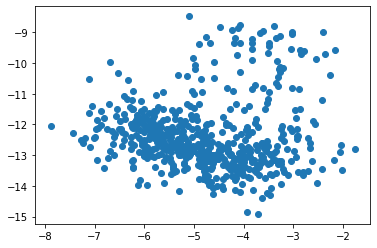

In [9]:
plt.scatter(gaiadata3[:,1],gaiadata3[:,0])

Text(0, 0.5, '$\\mu_\\delta$ [$\\mu$as/year]')

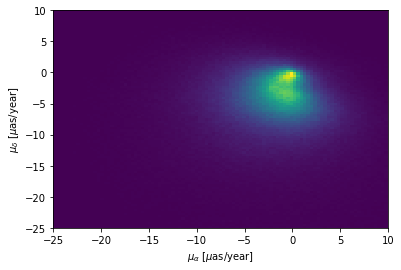

In [10]:
# _,_,_,_=plt.hist2d(gaiadata2[:,1]*np.cos(gaiadata2[:,2]),gaiadata2[:,0],bins=[np.linspace(-25,10,100),np.linspace(-25,10,100)])
_,_,_,_=plt.hist2d(gaiadata2[:,1],gaiadata2[:,0],bins=[np.linspace(-25,10,100),np.linspace(-25,10,100)])
plt.xlabel(r"$\mu_\alpha$ [$\mu$as/year]")
plt.ylabel(r"$\mu_\delta$ [$\mu$as/year]")

Text(0, 0.5, '$\\delta$ [degrees]')

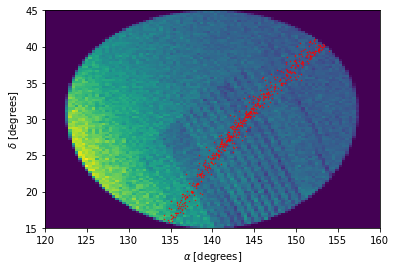

In [11]:
_,_,_,_=plt.hist2d(gaiadata2[:,3],gaiadata2[:,2],bins=[np.linspace(120,160,100),np.linspace(15,45,100)])
plt.scatter(gaiadata3[:,3],gaiadata3[:,2],color='red',s=0.2)
plt.xlabel(r"$\alpha$ [degrees]")
plt.ylabel(r"$\delta$ [degrees]")

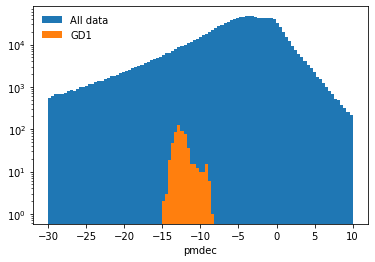

In [12]:
_,_,_=plt.hist(gaiadata2[:,0],bins=np.linspace(-30,10,100),label="All data")
_,_,_=plt.hist(gaiadata3[:,0],bins=np.linspace(-30,10,100),label="GD1")
plt.legend(frameon=False)
plt.yscale("log")
plt.xlabel('pmdec')
plt.show()

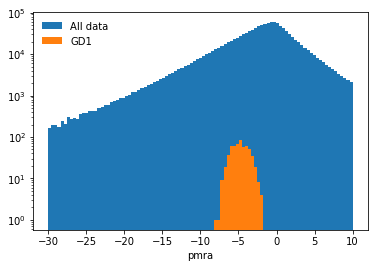

In [13]:
_,_,_=plt.hist(gaiadata2[:,1],bins=np.linspace(-30,10,100),label="All data")
_,_,_=plt.hist(gaiadata3[:,1],bins=np.linspace(-30,10,100),label="GD1")
plt.legend(frameon=False)
plt.yscale("log")
plt.xlabel('pmra')
plt.show()

## On-GD1, pmdec

In [14]:
perms = list(range(len(gaiadata2[0])))
perms[0] = 0
perms[1] = 1

SR = gaiadata2[:,perms][(gaiadata2[:,0] > -15)*(gaiadata2[:,0] < -11)]
SB = gaiadata2[:,perms][(gaiadata2[:,0] > -18)*(gaiadata2[:,0] < -15)+(gaiadata2[:,perms[0]] > -11)*(gaiadata2[:,0] < -9.5)]
rest_data = gaiadata2[:,perms][np.logical_or((gaiadata2[:,0] > -9.5),(gaiadata2[:,0] < -18))]

GD1 = gaiadata3[:,perms]

theta=0

X = SR[:,3]-center_ra
Y = SR[:,2]-center_dec
Xr = X*np.cos(theta) + Y*np.sin(theta)
Yr = -X*np.sin(theta) + Y*np.cos(theta)

Xb = SB[:,3]-center_ra
Yb = SB[:,2]-center_dec
Xbr = Xb*np.cos(theta) + Yb*np.sin(theta)
Ybr = -Xb*np.sin(theta) + Yb*np.cos(theta)

Xrd = rest_data[:,3]-center_ra
Yrd = rest_data[:,2]-center_dec
Xrdr = Xrd*np.cos(theta) + Yrd*np.sin(theta)
Yrdr = -Xrd*np.sin(theta) + Yrd*np.cos(theta)

Xs = GD1[:,3]-center_ra
Ys = GD1[:,2]-center_dec
Xsr = Xs*np.cos(theta) + Ys*np.sin(theta)
Ysr = -Xs*np.sin(theta) + Ys*np.cos(theta)

SR = np.c_[SR[:,0],SR[:,1],Yr,Xr,SR[:,4],SR[:,5]]
SB = np.c_[SB[:,0],SB[:,1],Ybr,Xbr,SB[:,4],SB[:,5]]
GD1 = np.c_[GD1[:,0],GD1[:,1],Ysr,Xsr,GD1[:,4],GD1[:,5]]
rest_data = np.c_[rest_data[:,0],rest_data[:,1],Yrdr,Xrdr,rest_data[:,4],rest_data[:,5]]

X = np.concatenate([SR,SB,GD1])
Y = np.concatenate([np.ones(len(SR)),np.zeros(len(SB)),2.*np.ones(len(GD1))])
X_scaled = X
myscaler = StandardScaler()
myscaler.fit(X[:,1:])
X_scaled[:,1:] = myscaler.transform(X[:,1:])
GD1_scaled = X_scaled[Y==2]
X_scaled = X_scaled[Y<2]
Y = Y[Y<2]
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.5)

82667
84009


Text(0, 0.5, 'counts')

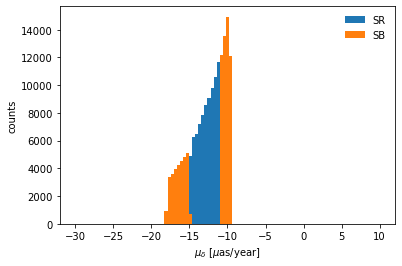

In [15]:
print(len(SR))
print(len(SB))

_,_,_=plt.hist(SR[:,0],bins=np.linspace(-30,10,100),label="SR")
_,_,_=plt.hist(SB[:,0],bins=np.linspace(-30,10,100),label="SB")
plt.legend(frameon=False)
plt.xlabel(r"$\mu_\delta$ [$\mu$as/year]")
plt.ylabel("counts")

In [16]:
model = Sequential()
model.add(Dense(256, input_dim=5, activation='relu',bias_initializer='glorot_normal')) 
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train[:,1:],Y_train, epochs=30, batch_size=200,validation_data=(X_test[:,1:],Y_test))

Epoch 1/30
417/417 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.5023 - val_loss: 0.6930 - val_accuracy: 0.5068
Epoch 2/30
417/417 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5076 - val_loss: 0.6930 - val_accuracy: 0.5086
Epoch 3/30
417/417 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5102 - val_loss: 0.6930 - val_accuracy: 0.5086
Epoch 4/30
417/417 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5116 - val_loss: 0.6930 - val_accuracy: 0.5092
Epoch 5/30
417/417 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5143 - val_loss: 0.6927 - val_accuracy: 0.5132
Epoch 6/30
417/417 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.5152 - val_loss: 0.6929 - val_accuracy: 0.5111
Epoch 7/30
417/417 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5168 - val_loss: 0.6923 - val_accuracy: 0.5155
Epoch 

Text(0, 0.5, 'Loss')

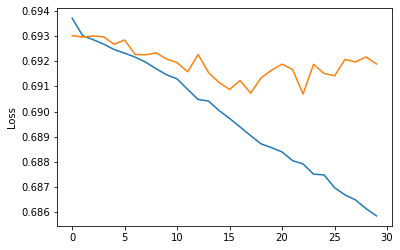

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("Loss")

Text(0.5, 0, 'NN')

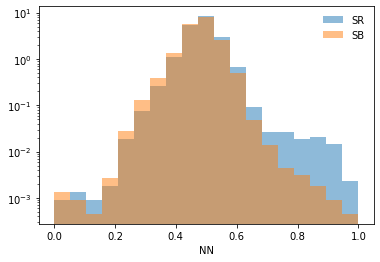

In [18]:
preds = model.predict(X_test[:,1:6], batch_size=int(0.1*len(X_test)))
preds_GD1 = model.predict(GD1_scaled[:,1:6], batch_size=int(0.1*len(GD1_scaled)))

plt.hist(preds[Y_test==1],alpha=0.5,bins=np.linspace(0,1,20),label="SR",density=True)
plt.hist(preds[Y_test==0],alpha=0.5,bins=np.linspace(0,1,20),label="SB",density=True)
plt.legend(frameon=False)
plt.yscale("log")
plt.xlabel("NN")

In [19]:
rest_data_half = np.copy(rest_data[:int(len(rest_data)/2)])
rest_data_half[:,1:] = myscaler.transform(rest_data_half[:,1:]) 
preds_rest_data = model.predict(rest_data_half[:,1:])

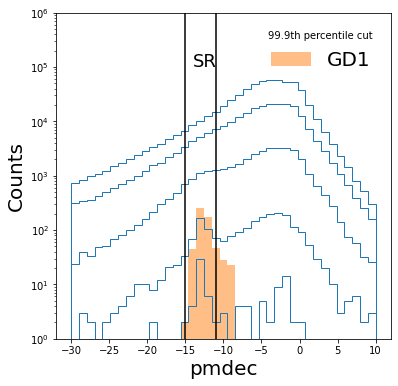

In [20]:
bins=np.linspace(-30,10,40)
#X_pass_GD1 = GD1_scaled[preds_GD1[:,0] > np.quantile(preds[Y_test==1],[cut])[0]]
X_pass_GD1 = GD1_scaled[preds_GD1[:,0] > 0]
plt.figure(figsize=(6,6))
plt.hist(X_pass_GD1[:,0],label="GD1",alpha=0.5,bins=bins,color='C1')


for cut in [0.,0.5,0.9,0.99,0.999]:

    X_pass = X_test[(preds[:,0] > np.quantile(preds[Y_test==1],[cut])[0])]
    X_pass_rest = rest_data_half[preds_rest_data[:,0] > np.quantile(preds[Y_test==1],[cut])[0]]
    plot_all = np.concatenate((X_pass_rest,X_pass),axis=0)




    plt.hist(plot_all[:,0],alpha=1.,bins=bins,histtype='step',color='C0')

    #plt.hist(X_pass_rest[:,0],label="rest",alpha=0.5,bins=bins)
plt.yscale("log")
plt.legend(frameon=False,title=str(100*cut)+"th percentile cut",fontsize=20)
plt.ylim([1,1e6])
plt.ylabel("Counts",fontsize=20)
plt.xlabel(r"pmdec",fontsize=20)
plt.axvline(-15,color='black')
plt.axvline(-11,color='black')
plt.text(-14,10**5,'SR',fontsize=18)
plt.show()

## On-GD1, pmra

In [21]:
perms = list(range(len(gaiadata2[0])))
perms[0] = 1
perms[1] = 0

SR = gaiadata2[:,perms][(gaiadata2[:,perms[0]] > -7)*(gaiadata2[:,perms[0]] < -2.7)]
SB = gaiadata2[:,perms][(gaiadata2[:,perms[0]] > -10)*(gaiadata2[:,perms[0]] < -7)+(gaiadata2[:,perms[0]] > -2.7)*(gaiadata2[:,perms[0]] < -1)]
rest_data = gaiadata2[:,perms][np.logical_or((gaiadata2[:,perms[0]] > -1),(gaiadata2[:,perms[0]] < -10))]

GD1 = gaiadata3[:,perms]

theta=0

X = SR[:,3]-center_ra
Y = SR[:,2]-center_dec
Xr = X*np.cos(theta) + Y*np.sin(theta)
Yr = -X*np.sin(theta) + Y*np.cos(theta)

Xb = SB[:,3]-center_ra
Yb = SB[:,2]-center_dec
Xbr = Xb*np.cos(theta) + Yb*np.sin(theta)
Ybr = -Xb*np.sin(theta) + Yb*np.cos(theta)

Xrd = rest_data[:,3]-center_ra
Yrd = rest_data[:,2]-center_dec
Xrdr = Xrd*np.cos(theta) + Yrd*np.sin(theta)
Yrdr = -Xrd*np.sin(theta) + Yrd*np.cos(theta)

Xs = GD1[:,3]-center_ra
Ys = GD1[:,2]-center_dec
Xsr = Xs*np.cos(theta) + Ys*np.sin(theta)
Ysr = -Xs*np.sin(theta) + Ys*np.cos(theta)

SR = np.c_[SR[:,0],SR[:,1],Yr,Xr,SR[:,4],SR[:,5]]
SB = np.c_[SB[:,0],SB[:,1],Ybr,Xbr,SB[:,4],SB[:,5]]
GD1 = np.c_[GD1[:,0],GD1[:,1],Ysr,Xsr,GD1[:,4],GD1[:,5]]
rest_data = np.c_[rest_data[:,0],rest_data[:,1],Yrdr,Xrdr,rest_data[:,4],rest_data[:,5]]

X = np.concatenate([SR,SB,GD1])
Y = np.concatenate([np.ones(len(SR)),np.zeros(len(SB)),2.*np.ones(len(GD1))])
X_scaled = X
myscaler = StandardScaler()
myscaler.fit(X[:,1:])
X_scaled[:,1:] = myscaler.transform(X[:,1:])
GD1_scaled = X_scaled[Y==2]
X_scaled = X_scaled[Y<2]
Y = Y[Y<2]
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.5)

In [22]:
print(len(SR))
print(len(SB))

294210
297380


In [23]:
model = Sequential()
model.add(Dense(256, input_dim=5, activation='relu',bias_initializer='glorot_normal')) 
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train[:,1:],Y_train, epochs=30, batch_size=200,validation_data=(X_test[:,1:],Y_test))

Epoch 1/30
1479/1479 [==============================] - 5s 3ms/step - loss: 0.6812 - accuracy: 0.5492 - val_loss: 0.6789 - val_accuracy: 0.5524
Epoch 2/30
1479/1479 [==============================] - 5s 3ms/step - loss: 0.6791 - accuracy: 0.5524 - val_loss: 0.6797 - val_accuracy: 0.5520
Epoch 3/30
1479/1479 [==============================] - 5s 3ms/step - loss: 0.6787 - accuracy: 0.5533 - val_loss: 0.6791 - val_accuracy: 0.5523
Epoch 4/30
1479/1479 [==============================] - 5s 3ms/step - loss: 0.6783 - accuracy: 0.5541 - val_loss: 0.6790 - val_accuracy: 0.5527
Epoch 5/30
1479/1479 [==============================] - 5s 3ms/step - loss: 0.6780 - accuracy: 0.5546 - val_loss: 0.6789 - val_accuracy: 0.5528
Epoch 6/30
1479/1479 [==============================] - 5s 3ms/step - loss: 0.6778 - accuracy: 0.5549 - val_loss: 0.6785 - val_accuracy: 0.5525
Epoch 7/30
1479/1479 [==============================] - 5s 3ms/step - loss: 0.6776 - accuracy: 0.5550 - val_loss: 0.6780 - val_accuracy:

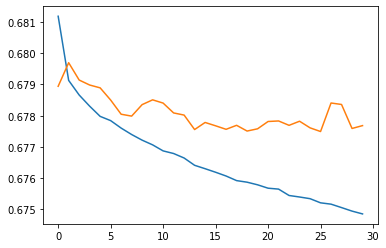

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [25]:
preds = model.predict(X_test[:,1:6], batch_size=int(0.1*len(X_test)))
preds_GD1 = model.predict(GD1_scaled[:,1:6], batch_size=int(0.1*len(GD1_scaled)))

Text(0.5, 0, 'NN')

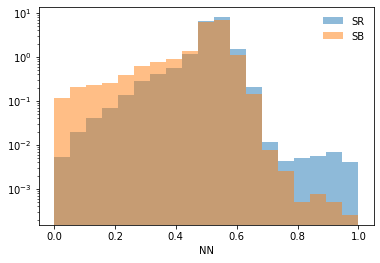

In [26]:
plt.hist(preds[Y_test==1],alpha=0.5,bins=np.linspace(0,1,20),label="SR",density=True)
plt.hist(preds[Y_test==0],alpha=0.5,bins=np.linspace(0,1,20),label="SB",density=True)
plt.legend(frameon=False)
plt.yscale("log")
plt.xlabel("NN")

In [27]:
rest_data_half = rest_data[:int(len(rest_data)/2)]
rest_data_half[:,1:] = myscaler.transform(rest_data_half[:,1:]) 
preds_rest_data = model.predict(rest_data_half[:,1:])

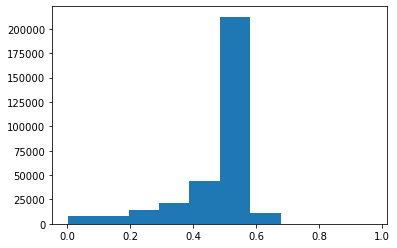

In [28]:
plt.hist(preds_rest_data)
plt.show()

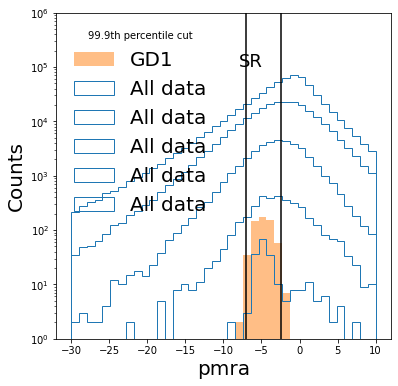

In [29]:
bins=np.linspace(-30,10,40)
#X_pass_GD1 = GD1_scaled[preds_GD1[:,0] > np.quantile(preds[Y_test==1],[cut])[0]]
X_pass_GD1 = GD1_scaled[preds_GD1[:,0] > 0]
plt.figure(figsize=(6,6))
plt.hist(X_pass_GD1[:,0],label="GD1",alpha=0.5,bins=bins,color='C1')


for cut in [0.,0.5,0.9,0.99,0.999]:

    X_pass = X_test[(preds[:,0] > np.quantile(preds[Y_test==1],[cut])[0])]
    X_pass_rest = rest_data_half[preds_rest_data[:,0] > np.quantile(preds[Y_test==1],[cut])[0]]
    plot_all = np.concatenate((X_pass_rest,X_pass),axis=0)




    plt.hist(plot_all[:,0],label="All data",alpha=1.,bins=bins,histtype='step',color='C0')

    #plt.hist(X_pass_rest[:,0],label="rest",alpha=0.5,bins=bins)
plt.yscale("log")
plt.legend(frameon=False,title=str(100*cut)+"th percentile cut",fontsize=20)
plt.ylim([1,1e6])
plt.ylabel("Counts",fontsize=20)
plt.xlabel(r"pmra",fontsize=20)
plt.axvline(-2.5,color='black')
plt.axvline(-7,color='black')
plt.text(-8,10**5,'SR',fontsize=18)
plt.show()

## Off-GD1, pmdec

In [30]:
perms = list(range(len(gaiadata2[0])))
perms[0] = 0
perms[1] = 1

SR = gaiadata2[:,perms][(gaiadata2[:,0] > -22)*(gaiadata2[:,0] < -17)]
SB = gaiadata2[:,perms][(gaiadata2[:,0] > -25)*(gaiadata2[:,0] < -22)+(gaiadata2[:,perms[0]] > -17)*(gaiadata2[:,0] < -15)]
rest_data = gaiadata2[:,perms][np.logical_or((gaiadata2[:,0] > -15),(gaiadata2[:,0] < -25))]

GD1 = gaiadata3[:,perms]

theta=0

X = SR[:,3]-center_ra
Y = SR[:,2]-center_dec
Xr = X*np.cos(theta) + Y*np.sin(theta)
Yr = -X*np.sin(theta) + Y*np.cos(theta)

Xb = SB[:,3]-center_ra
Yb = SB[:,2]-center_dec
Xbr = Xb*np.cos(theta) + Yb*np.sin(theta)
Ybr = -Xb*np.sin(theta) + Yb*np.cos(theta)

Xrd = rest_data[:,3]-center_ra
Yrd = rest_data[:,2]-center_dec
Xrdr = Xrd*np.cos(theta) + Yrd*np.sin(theta)
Yrdr = -Xrd*np.sin(theta) + Yrd*np.cos(theta)

Xs = GD1[:,3]-center_ra
Ys = GD1[:,2]-center_dec
Xsr = Xs*np.cos(theta) + Ys*np.sin(theta)
Ysr = -Xs*np.sin(theta) + Ys*np.cos(theta)

SR = np.c_[SR[:,0],SR[:,1],Yr,Xr,SR[:,4],SR[:,5]]
SB = np.c_[SB[:,0],SB[:,1],Ybr,Xbr,SB[:,4],SB[:,5]]
GD1 = np.c_[GD1[:,0],GD1[:,1],Ysr,Xsr,GD1[:,4],GD1[:,5]]
rest_data = np.c_[rest_data[:,0],rest_data[:,1],Yrdr,Xrdr,rest_data[:,4],rest_data[:,5]]

X = np.concatenate([SR,SB,GD1])
Y = np.concatenate([np.ones(len(SR)),np.zeros(len(SB)),2.*np.ones(len(GD1))])
X_scaled = X
myscaler = StandardScaler()
myscaler.fit(X[:,1:])
X_scaled[:,1:] = myscaler.transform(X[:,1:])
GD1_scaled = X_scaled[Y==2]
X_scaled = X_scaled[Y<2]
Y = Y[Y<2]
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.5)

31552
32626


Text(0, 0.5, 'counts')

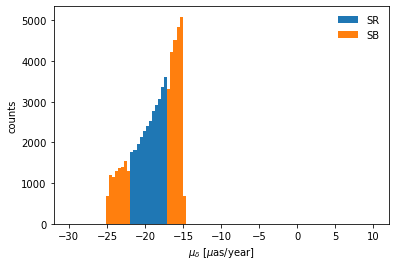

In [31]:
print(len(SR))
print(len(SB))

_,_,_=plt.hist(SR[:,0],bins=np.linspace(-30,10,100),label="SR")
_,_,_=plt.hist(SB[:,0],bins=np.linspace(-30,10,100),label="SB")
plt.legend(frameon=False)
plt.xlabel(r"$\mu_\delta$ [$\mu$as/year]")
plt.ylabel("counts")

In [32]:
model = Sequential()
model.add(Dense(256, input_dim=5, activation='relu',bias_initializer='glorot_normal')) 
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train[:,1:],Y_train, epochs=30, batch_size=200,validation_data=(X_test[:,1:],Y_test))

Epoch 1/30
161/161 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.5093 - val_loss: 0.6934 - val_accuracy: 0.5088
Epoch 2/30
161/161 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5147 - val_loss: 0.6939 - val_accuracy: 0.5091
Epoch 3/30
161/161 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5146 - val_loss: 0.6928 - val_accuracy: 0.5108
Epoch 4/30
161/161 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5166 - val_loss: 0.6925 - val_accuracy: 0.5121
Epoch 5/30
161/161 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5165 - val_loss: 0.6926 - val_accuracy: 0.5100
Epoch 6/30
161/161 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.5192 - val_loss: 0.6925 - val_accuracy: 0.5124
Epoch 7/30
161/161 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.5204 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 

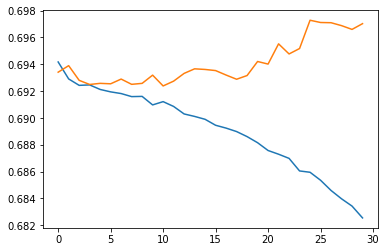

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [34]:
preds = model.predict(X_test[:,1:6], batch_size=int(0.1*len(X_test)))
preds_GD1 = model.predict(GD1_scaled[:,1:6], batch_size=int(0.1*len(GD1_scaled)))

Text(0.5, 0, 'NN')

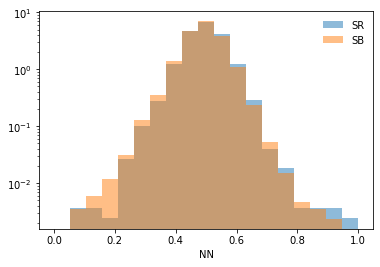

In [35]:
plt.hist(preds[Y_test==1],alpha=0.5,bins=np.linspace(0,1,20),label="SR",density=True)
plt.hist(preds[Y_test==0],alpha=0.5,bins=np.linspace(0,1,20),label="SB",density=True)
plt.legend(frameon=False)
plt.yscale("log")
plt.xlabel("NN")

In [36]:
rest_data_half = rest_data[:int(len(rest_data)/2)]
rest_data_half[:,1:] = myscaler.transform(rest_data_half[:,1:]) 
preds_rest_data = model.predict(rest_data_half[:,1:])

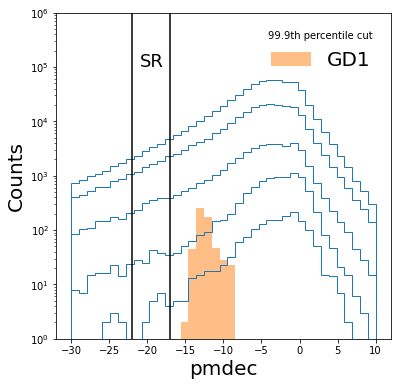

In [39]:
bins=np.linspace(-30,10,40)
#X_pass_GD1 = GD1_scaled[preds_GD1[:,0] > np.quantile(preds[Y_test==1],[cut])[0]]
X_pass_GD1 = GD1_scaled[preds_GD1[:,0] > 0]
plt.figure(figsize=(6,6))
plt.hist(X_pass_GD1[:,0],label="GD1",alpha=0.5,bins=bins,color='C1')


for cut in [0.,0.5,0.9,0.99,0.999]:

    X_pass = X_test[(preds[:,0] > np.quantile(preds[Y_test==1],[cut])[0])]
    X_pass_rest = rest_data_half[preds_rest_data[:,0] > np.quantile(preds[Y_test==1],[cut])[0]]
    plot_all = np.concatenate((X_pass_rest,X_pass),axis=0)




    plt.hist(plot_all[:,0],alpha=1.,bins=bins,histtype='step',color='C0')

    #plt.hist(X_pass_rest[:,0],label="rest",alpha=0.5,bins=bins)
plt.yscale("log")
plt.legend(frameon=False,title=str(100*cut)+"th percentile cut",fontsize=20)
plt.ylim([1,1e6])
plt.ylabel("Counts",fontsize=20)
plt.xlabel(r"pmdec",fontsize=20)
plt.axvline(-22,color='black')
plt.axvline(-17,color='black')
plt.text(-21,10**5,'SR',fontsize=18)
plt.show()

In [38]:
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [36]:
fpr, tpr, thresholds = roc_curve(np.concatenate([np.zeros(len(preds)),np.ones(len(preds_GD1))]), np.concatenate([preds,preds_GD1]))

Text(0, 0.5, 'Significance Improvement')

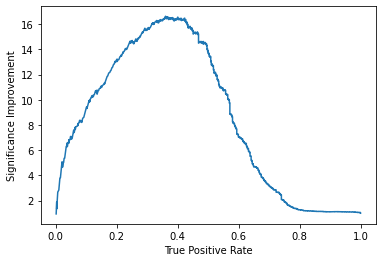

In [37]:
plt.plot(tpr,tpr/fpr**0.5)
plt.xlabel("True Positive Rate")
plt.ylabel("Significance Improvement")

In [55]:
#Repeat with GD1 removed.